## Let's Work on our Betting Strategy

In [1]:
import pandas as pd
odds = pd.read_csv('betting_odds', index_col=0)
odds

,teams,scores,opener,BET365
0,Paris Saint Germain,1,-110.0,200.0
1,Monaco,3,275.0,137.0
2,Draw,,260.0,230.0
3,Marseille,2,-133.0,-150.0
4,Clermont Foot,0,375.0,450.0
5,Draw,,250.0,250.0


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


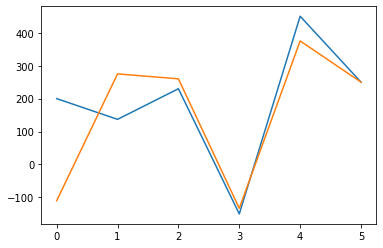

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(odds.BET365)
plt.plot(odds.opener)